# Stack overflow 2017 survey analysis

> Let's get some conclusions from the results of the Stack Overflow 2017 developer survey.

In [115]:
%%capture
import pandas as pd
import plotly
import plotly.express as px
import pycountry

#plotly.offline.init_notebook_mode()

pd.options.display.max_columns = None
raw_df = pd.read_csv('developer_survey_2017/survey_results_public.csv')
country_alpha = raw_df.Country.apply(lambda x: pycountry.countries.get(name=x).alpha_3 if pycountry.countries.get(name=x) else None)
df = raw_df.assign(CountryAlpha = country_alpha)

## Audience

Before diving into the numbers, let's see what the audience looks like.

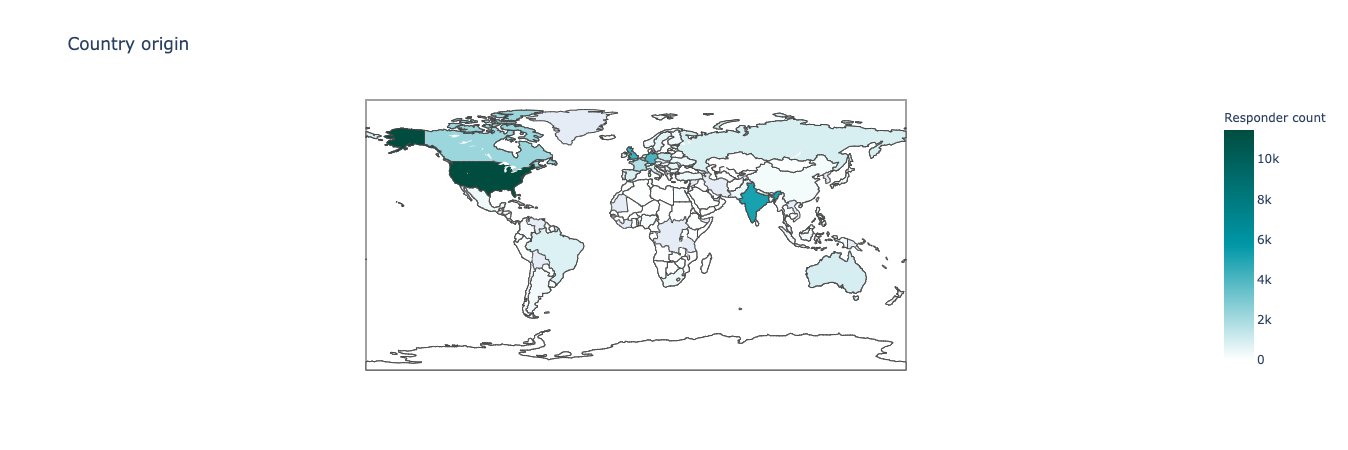

In [101]:
count_by_country_df = df.CountryAlpha.value_counts().to_frame(name="Count").reset_index().rename(columns={'index': 'CountryCode'})
country_name = count_by_country_df.CountryCode.apply(lambda x: pycountry.countries.get(alpha_3=x).name if pycountry.countries.get(alpha_3=x) else None)
count_by_country_df = count_by_country_df.assign(Country = country_name)
fig = px.choropleth(count_by_country_df, locations = "CountryCode", color="Count",
                    hover_name="Country", color_continuous_scale=["white", "#0097a7", "#004d40"],
                    labels={'Count':'Responder count'}, title="Country origin")
fig.show()

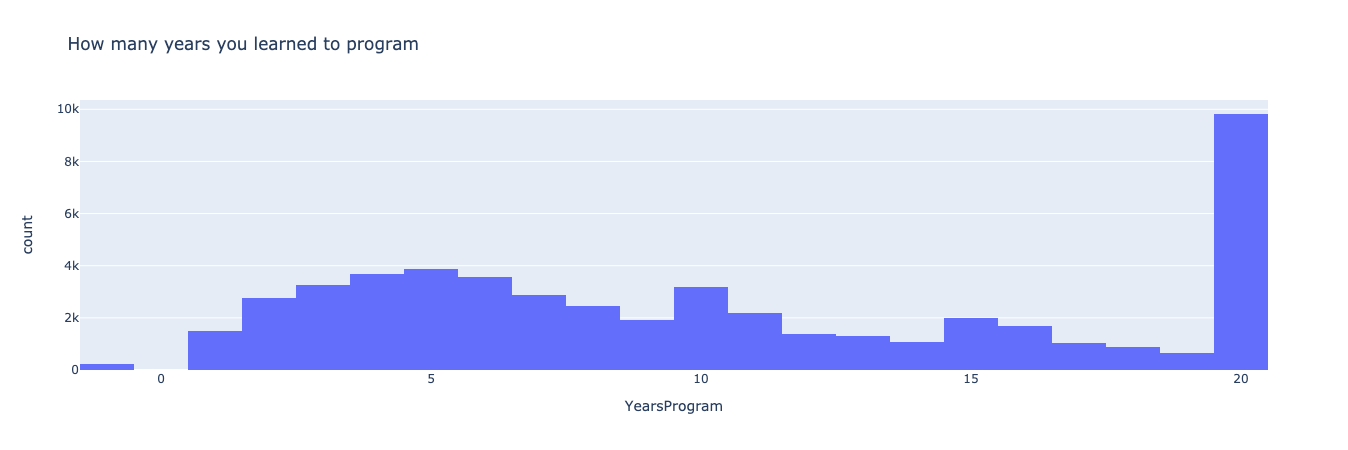

In [100]:
years_program_df = df.YearsProgram.to_frame(name="YearsProgram")
clean_years_program_df = years_program_df.replace(to_replace=r'^\d+\sto\s(\d+).*$', value='\\1', regex=True).replace(to_replace = "20 or more years", value = 20).replace(to_replace = "Less than a year", value = 1).fillna(-1)

fig2 = px.histogram(clean_years_program_df, x="YearsProgram", title="How many years you learned to program")
fig2.show()

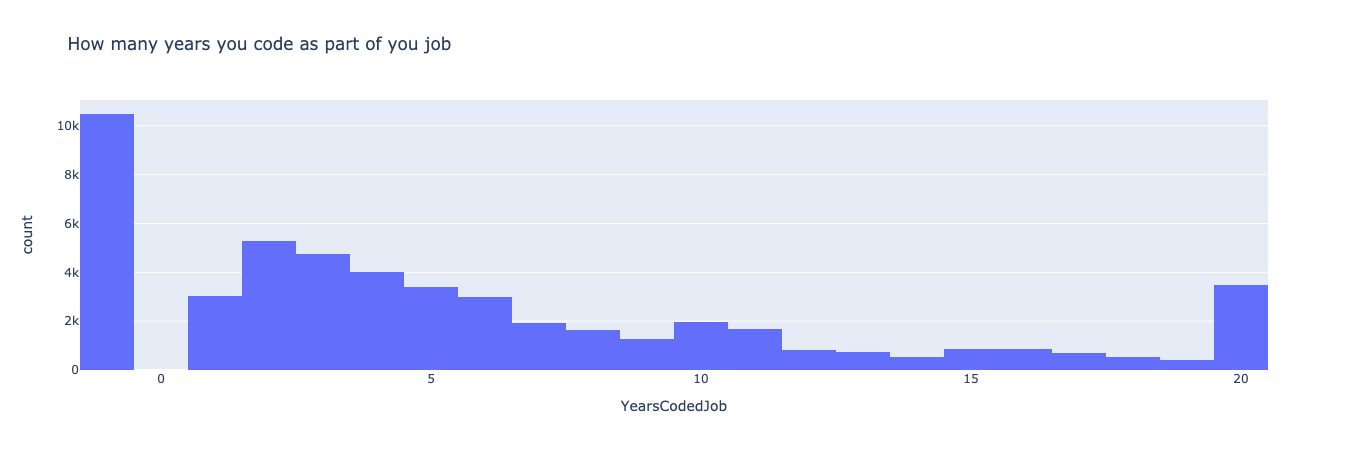

In [99]:
years_code_job_df = df.YearsCodedJob.to_frame(name="YearsCodedJob")
clean_years_code_job_df = years_code_job_df.replace(to_replace=r'^\d+\sto\s(\d+).*$', value='\\1', regex=True).replace(to_replace = "20 or more years", value = 20).replace(to_replace = "Less than a year", value = 1).fillna(-1)

fig_years_code_job = px.histogram(clean_years_code_job_df, x="YearsCodedJob", title="How many years you code as part of you job")
fig_years_code_job.show()

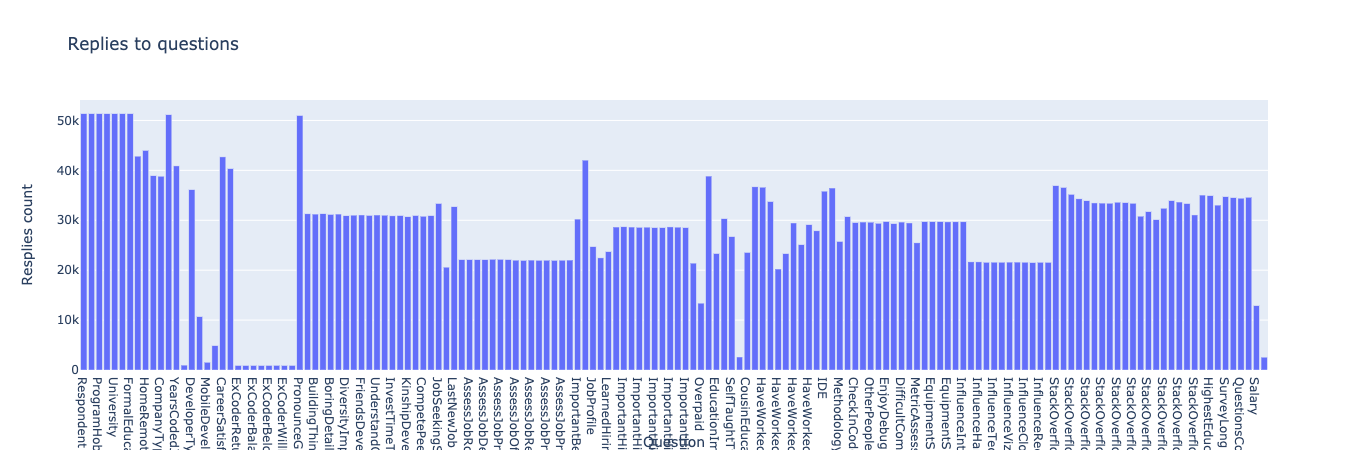

In [117]:
replied_questions_df = raw_df.notnull().sum(axis=0).to_frame(name="Sum").reset_index().rename(columns={'index': 'Question'})

fig_replies_questions_job = px.bar(replied_questions_df, x="Question", y="Sum", title="Replies to questions", labels={"Sum": "Resplies count"})
fig_replies_questions_job.show()